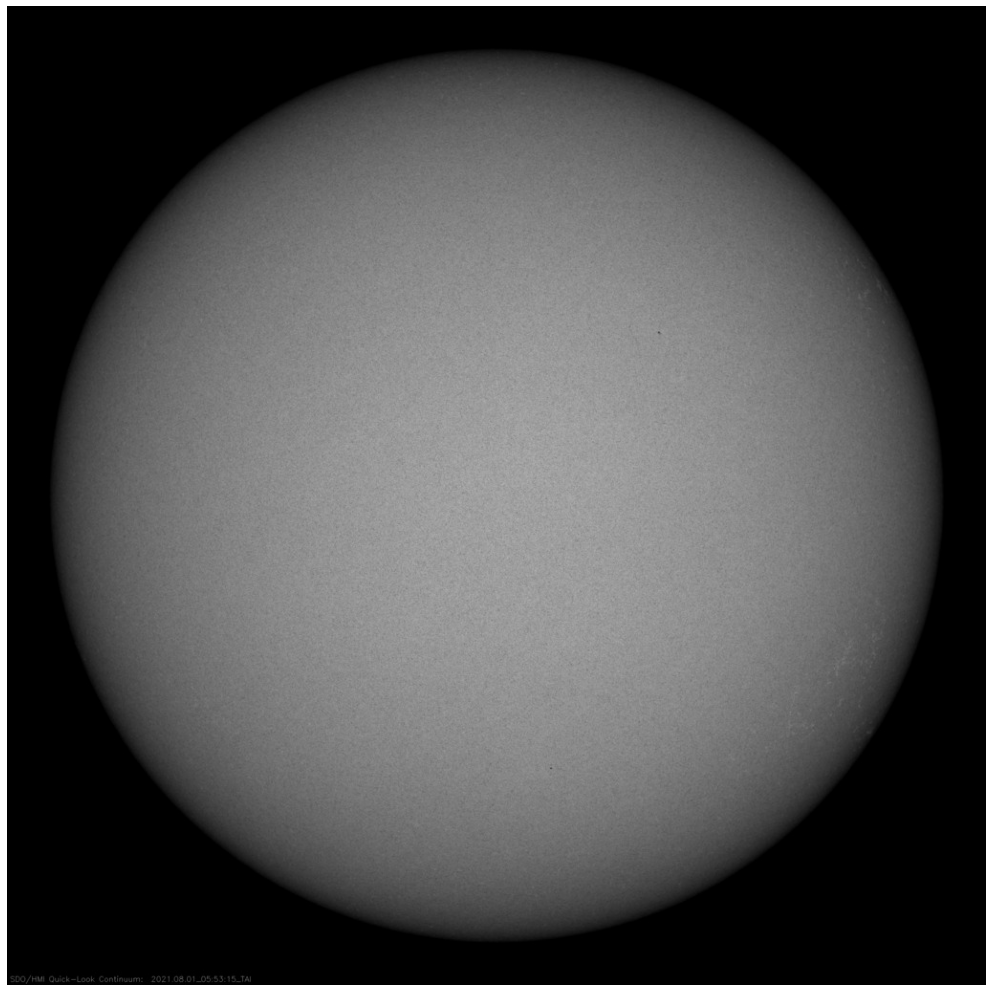

<Figure size 1296x1296 with 0 Axes>

In [10]:
# IMAGE DATA FROM NASA

import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import pandas as pd

def realtime_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image , dsize=(1024, 1024), interpolation=cv2.INTER_AREA)
    return image

def noise_cancelling(img, a, b, c, d):
    cancelled_img = cv2.fastNlMeansDenoisingColored(img, None, a, b, c, d)
    return cancelled_img
    
def main():
    url = "https://sdo.gsfc.nasa.gov/assets/img/latest/latest_1024_HMII.jpg"
    image = realtime_image(url)
    
    # a : The factor that determines the filter strength. Higher a values better eliminate noise 
    #     but also eliminate non-noise pixels (10 is appropriate)
    # b : Same as a, but only used for color images (usually equal to a)
    # c : templateWindowSize : Must be an odd value (5 recommended)
    # d : searchWindowSize : Must be an odd value (21 recommended)
    image = noise_cancelling(image, 5, 5, 5, 21)
    
    # 15 * 15 Image
    plt.rcParams["figure.figsize"] = (18, 18)
    imgplot = plt.imshow(image)
    
    # Axis off
    plt.axis("off")
    plt.show()
    
    # Image Save
    plt.tight_layout()
    plt.savefig('SUN.png')
    
if __name__ == "__main__":
    main()